In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/unWISE_dictonaries/')


#matplotlib.use('pdf')
font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [2]:
params = "best-fit"

In [3]:
if params == "mean":
    from green_dict_mean import *
    from red_dict_mean import *
    from blue_dict_mean import *
if params == "best-fit":
    from green_dict import *
    from red_dict import *
    from blue_dict import *

In [4]:
color="blue"

if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']


'blue'

# Data 

In [5]:
#data from unwise maps 
path_data = "/Users/aleksandra/software/ILC/g1g2_data/"

#cross
ell_gg_data_17, cl_gg_data_17, sigma_gg_data_17 = np.loadtxt(path_data+"g1g2_unwise_red_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_12, cl_gg_data_12, sigma_gg_data_12 = np.loadtxt(path_data+"g1g2_unwise_green_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_27, cl_gg_data_27, sigma_gg_data_27 = np.loadtxt(path_data+"g1g2_unwise_green_x_red_healpix_dl_nside2048.txt")
#auto
ell_gg_data_11, cl_gg_data_11, sigma_gg_data_11 = np.loadtxt(path_data+"g1g2_unwise_blue_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_22, cl_gg_data_22, sigma_gg_data_22 = np.loadtxt(path_data+"g1g2_unwise_green_x_green_healpix_dl_nside2048.txt")
ell_gg_data_77, cl_gg_data_77, sigma_gg_data_77 = np.loadtxt(path_data+"g1g2_unwise_red_x_red_healpix_dl_nside2048.txt")

In [6]:
shot_noise_blue = 0.92e-7
shot_noise_green = 1.81e-7
shot_noise_blue = 29.6e-7

In [7]:
## dict have to be mean of the posterior, best-fit gives something weird!! 

##  Alex data

In [8]:

path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
    A_shot_noise  = A_shot_noise_blue
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
    A_shot_noise  = A_shot_noise_green
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")
    #s = s_red
    A_shot_noise  = A_shot_noise_red
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cl_to_dl_alex = ell_alex*(ell_alex+1)/2/np.pi
print(color)
print(A_shot_noise)

blue
-0.25547369


NameError: name 'cl_gg_blue_ell' is not defined

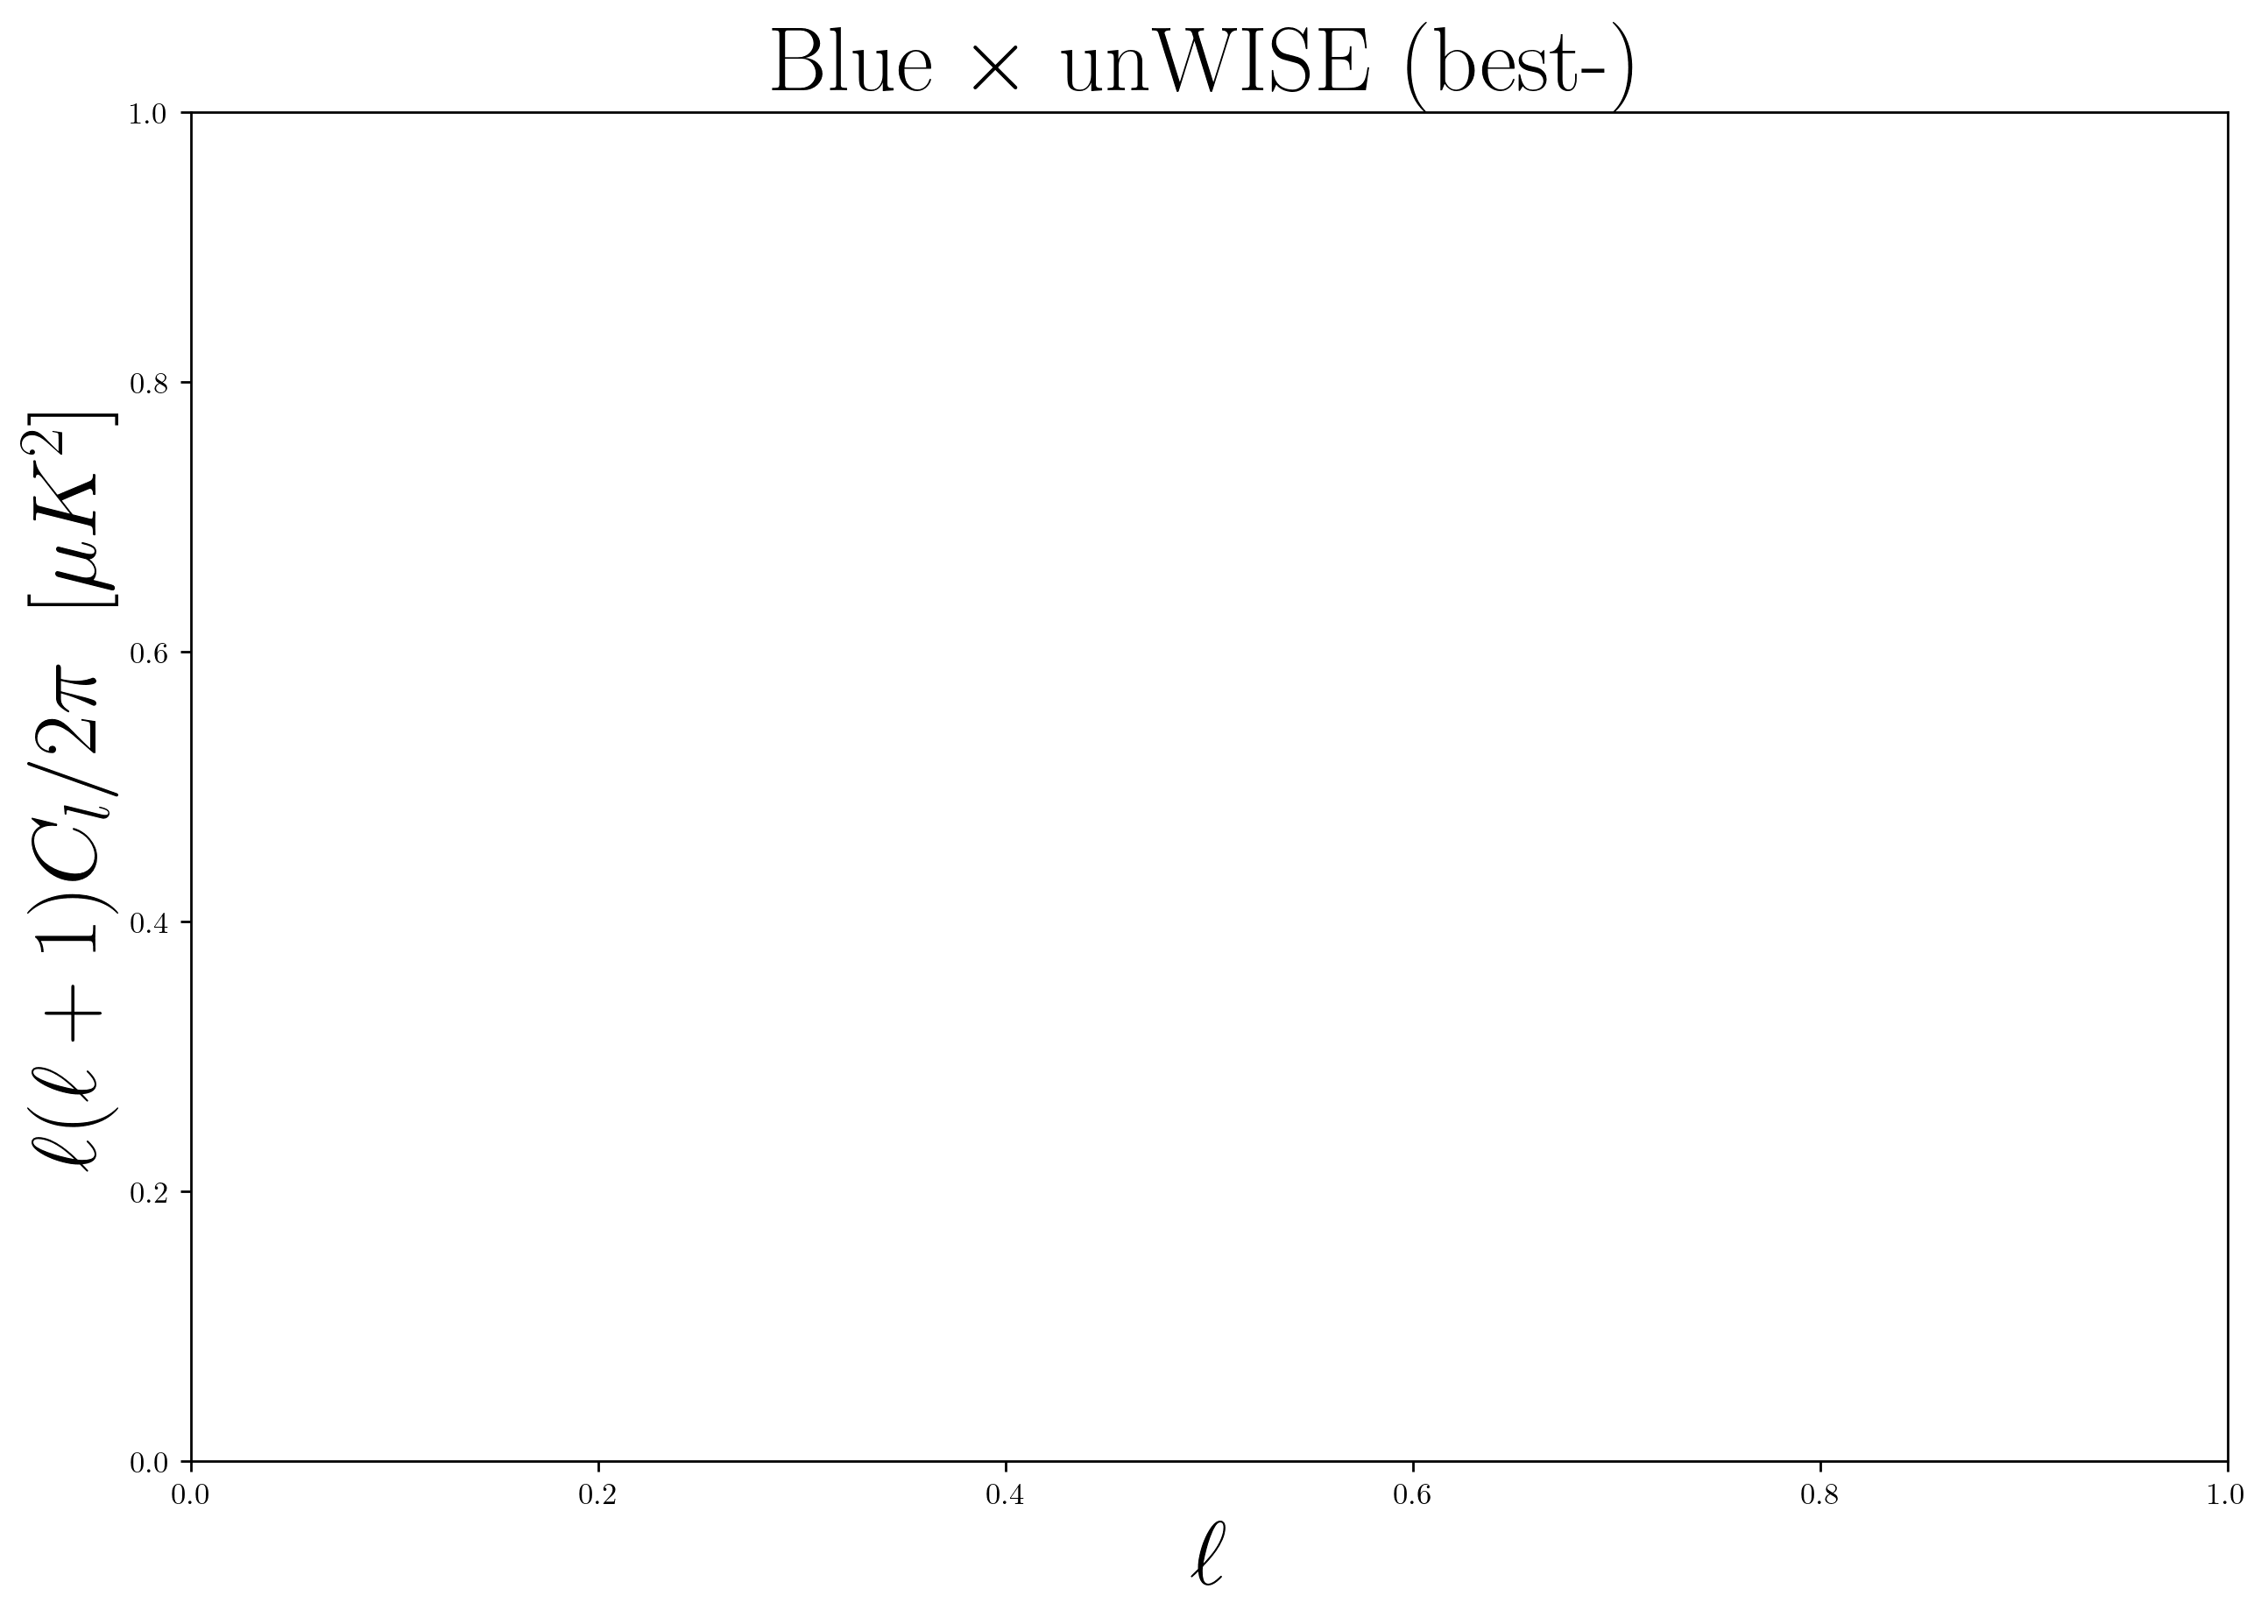

In [10]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.5s)'%params, fontsize=30)

plt.plot(cl_gg_blue_ell, cl_gg_blue, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue+A_shot_noise*1e-7*cl_to_dl_gg, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green, "--", color = "turquoise", label="blue x green")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red, ":", color = "purple", label="blue x red")
plt.plot(cl_gg_blue_ell, A_shot_noise*cl_to_dl_gg, "--", color = "lightblue", label="shot noise blue")

plt.errorbar(ell_gg_data_11, cl_gg_data_11, yerr = sigma_gg_data_11,  fmt= ".", color = "blue", capsize=4, label=" DATA blue x blue")
plt.errorbar(ell_alex, cl_alex*cl_to_dl_alex, yerr = sigma_alex,  fmt= "s", color = "lightblue", capsize=4, label=" DATA Alex")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
#plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.5s)'%params, fontsize=30)


plt.plot(cl_gg_blue_ell, cl_gg_blue, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green, "--", color = "turquoise", label="blue x green")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red, ":", color = "purple", label="blue x red")
plt.plot(cl_gg_blue_ell, shot_noise_blue*cl_to_dl_gg, "--", color = "lightblue", label="shot noise blue")

plt.errorbar(ell_gg_data_11, cl_gg_data_11, yerr = sigma_gg_data_11,  fmt= ".", color = "blue", capsize=4, label=" DATA blue x blue")
plt.errorbar(ell_alex, cl_alex*cl_to_dl_alex, yerr = sigma_alex,  fmt= "s", color = "lightblue", capsize=4, label=" DATA Alex")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


# class_sz

In [11]:
color = "blue"

if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']
pdict


{'galaxy_sample': 'unwise',
 'galaxy_sample_id': 'blue',
 'UNWISE_dndz_file': '/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt',
 'redshift_epsabs': 1e-40,
 'redshift_epsrel': 0.0005,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0005,
 'ndim_masses': 150,
 'ndim_redshifts': 150,
 'multipoles_sz': 'ell_mock',
 'ell_max': 1600.0,
 'ell_min': 2.0,
 'P_k_max_h/Mpc': 50.0,
 'k_min_for_pk_class_sz': 0.0001,
 'k_max_for_pk_class_sz': 10.0,
 'k_per_decade_class_sz': 20.0,
 'z_min': 0.005,
 'M_min': 700000000.0,
 'M_max': 3500000000000000.0,
 'hm_consistency': 1,
 'class_sz_verbose': 0,
 'nonlinear_verbose': 0,
 'delta for galaxies': '200c',
 'delta for matter density': '200c',
 'mass function': 'T08M200c',
 'concentration parameter': 'B13',
 'sigma_log10M_HOD': 0.68660116,
 'alpha_s_HOD': 1.3039425,
 'M1_prime_HOD': 5026989753411.133,
 'M_min_HOD': 625120872443.8624,
 'x_out_truncated_nfw_profile_satellite_galaxies': 1.0868995,
 'M0_HOD

In [12]:
z0, dndz0 = np.loadtxt("/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/blue.txt").T
z1, dndz1,  dndz2,  dnd7 = np.loadtxt("/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt").T

In [13]:
blue_pdict['sigma_log10M_HOD']

0.68660116

In [14]:
common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
            'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        #'dlogell':1,
        'dell':100
    
}

blue_HOD = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",

'sigma_log10M_HOD': blue_pdict['sigma_log10M_HOD'],
'alpha_s_HOD' :  blue_pdict['alpha_s_HOD'],
'M1_prime_HOD': blue_pdict['M1_prime_HOD'],
'M_min_HOD': blue_pdict['M_min_HOD'],
'x_out_truncated_nfw_profile_satellite_galaxies' : blue_pdict['x_out_truncated_nfw_profile_satellite_galaxies'],
}

green_HOD = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",

'sigma_log10M_HOD': green_pdict['sigma_log10M_HOD'],
'alpha_s_HOD' : green_pdict['alpha_s_HOD'],
'M1_prime_HOD': green_pdict['M1_prime_HOD'],
'M_min_HOD': green_pdict['M_min_HOD'],
'x_out_truncated_nfw_profile_satellite_galaxies' : green_pdict['x_out_truncated_nfw_profile_satellite_galaxies'],
}

red_HOD = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "red",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",

'sigma_log10M_HOD': red_pdict['sigma_log10M_HOD'],
'alpha_s_HOD' :  red_pdict['alpha_s_HOD'],
'M1_prime_HOD': red_pdict['M1_prime_HOD'],
'M_min_HOD': red_pdict['M_min_HOD'],
'x_out_truncated_nfw_profile_satellite_galaxies' : red_pdict['x_out_truncated_nfw_profile_satellite_galaxies'],
}


In [15]:
red_HOD

{'galaxy_sample': 'unwise',
 'galaxy_sample_id': 'red',
 'UNWISE_dndz_file': '/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt',
 'sigma_log10M_HOD': 0.4033951,
 'alpha_s_HOD': 1.6292653,
 'M1_prime_HOD': 33007071959706.23,
 'M_min_HOD': 5096147623420.011,
 'x_out_truncated_nfw_profile_satellite_galaxies': 0.18379845}

## Blue x unWISE

In [16]:
color ="blue"

galaxy1_HOD = blue_HOD
galaxy2_HOD = green_HOD

In [17]:
galaxy1_HOD['galaxy_sample_id']

'blue'

In [18]:
galaxy2_HOD['galaxy_sample_id']

'green'

In [19]:
M = Class()
M.set(pdict)
M.set(common_settings)
#M.set(blue_HOD)

M.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h',
        #'class_sz_verbose':1,
        #galaxy 1 
        'galaxy_sample1': galaxy1_HOD['galaxy_sample'],
        'galaxy_sample_id1': galaxy1_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': galaxy1_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': galaxy1_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': galaxy1_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': galaxy1_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': galaxy1_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': galaxy1_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': galaxy2_HOD['galaxy_sample'],
        'galaxy_sample_id2': galaxy2_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': galaxy2_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': galaxy2_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': galaxy2_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': galaxy2_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': galaxy2_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': galaxy2_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
M.compute()

blue_gg = M.cl_gg()
blue_x_green_gg = M.cl_g1g2()



In [20]:
cl_gg_blue_ell = np.asarray(blue_gg['ell'])
cl_gg_blue_1h = np.asarray(blue_gg['1h'])
cl_gg_blue_2h = np.asarray(blue_gg['2h'])
cl_gg_blue = cl_gg_blue_1h+cl_gg_blue_2h

cl_to_dl_gg = cl_gg_blue_ell*(cl_gg_blue_ell+1)/2/np.pi

#cl_gg_blue

In [21]:
cl_gg_blue_green_ell = np.asarray(blue_x_green_gg ['ell'])
cl_gg_blue_green_1h = np.asarray(blue_x_green_gg ['1h'])
cl_gg_blue_green_2h = np.asarray(blue_x_green_gg ['2h'])

cl_gg_blue_green = cl_gg_blue_green_1h + cl_gg_blue_green_2h

In [22]:
cl_gg_blue_green_2h[:5]

array([6.42434699e-06, 1.98353683e-04, 2.86936116e-04, 3.26083005e-04,
       3.37968589e-04])

In [23]:
cl_gg_blue_2h[:5]

array([0.00013357, 0.00440207, 0.00619368, 0.00694055, 0.00720181])

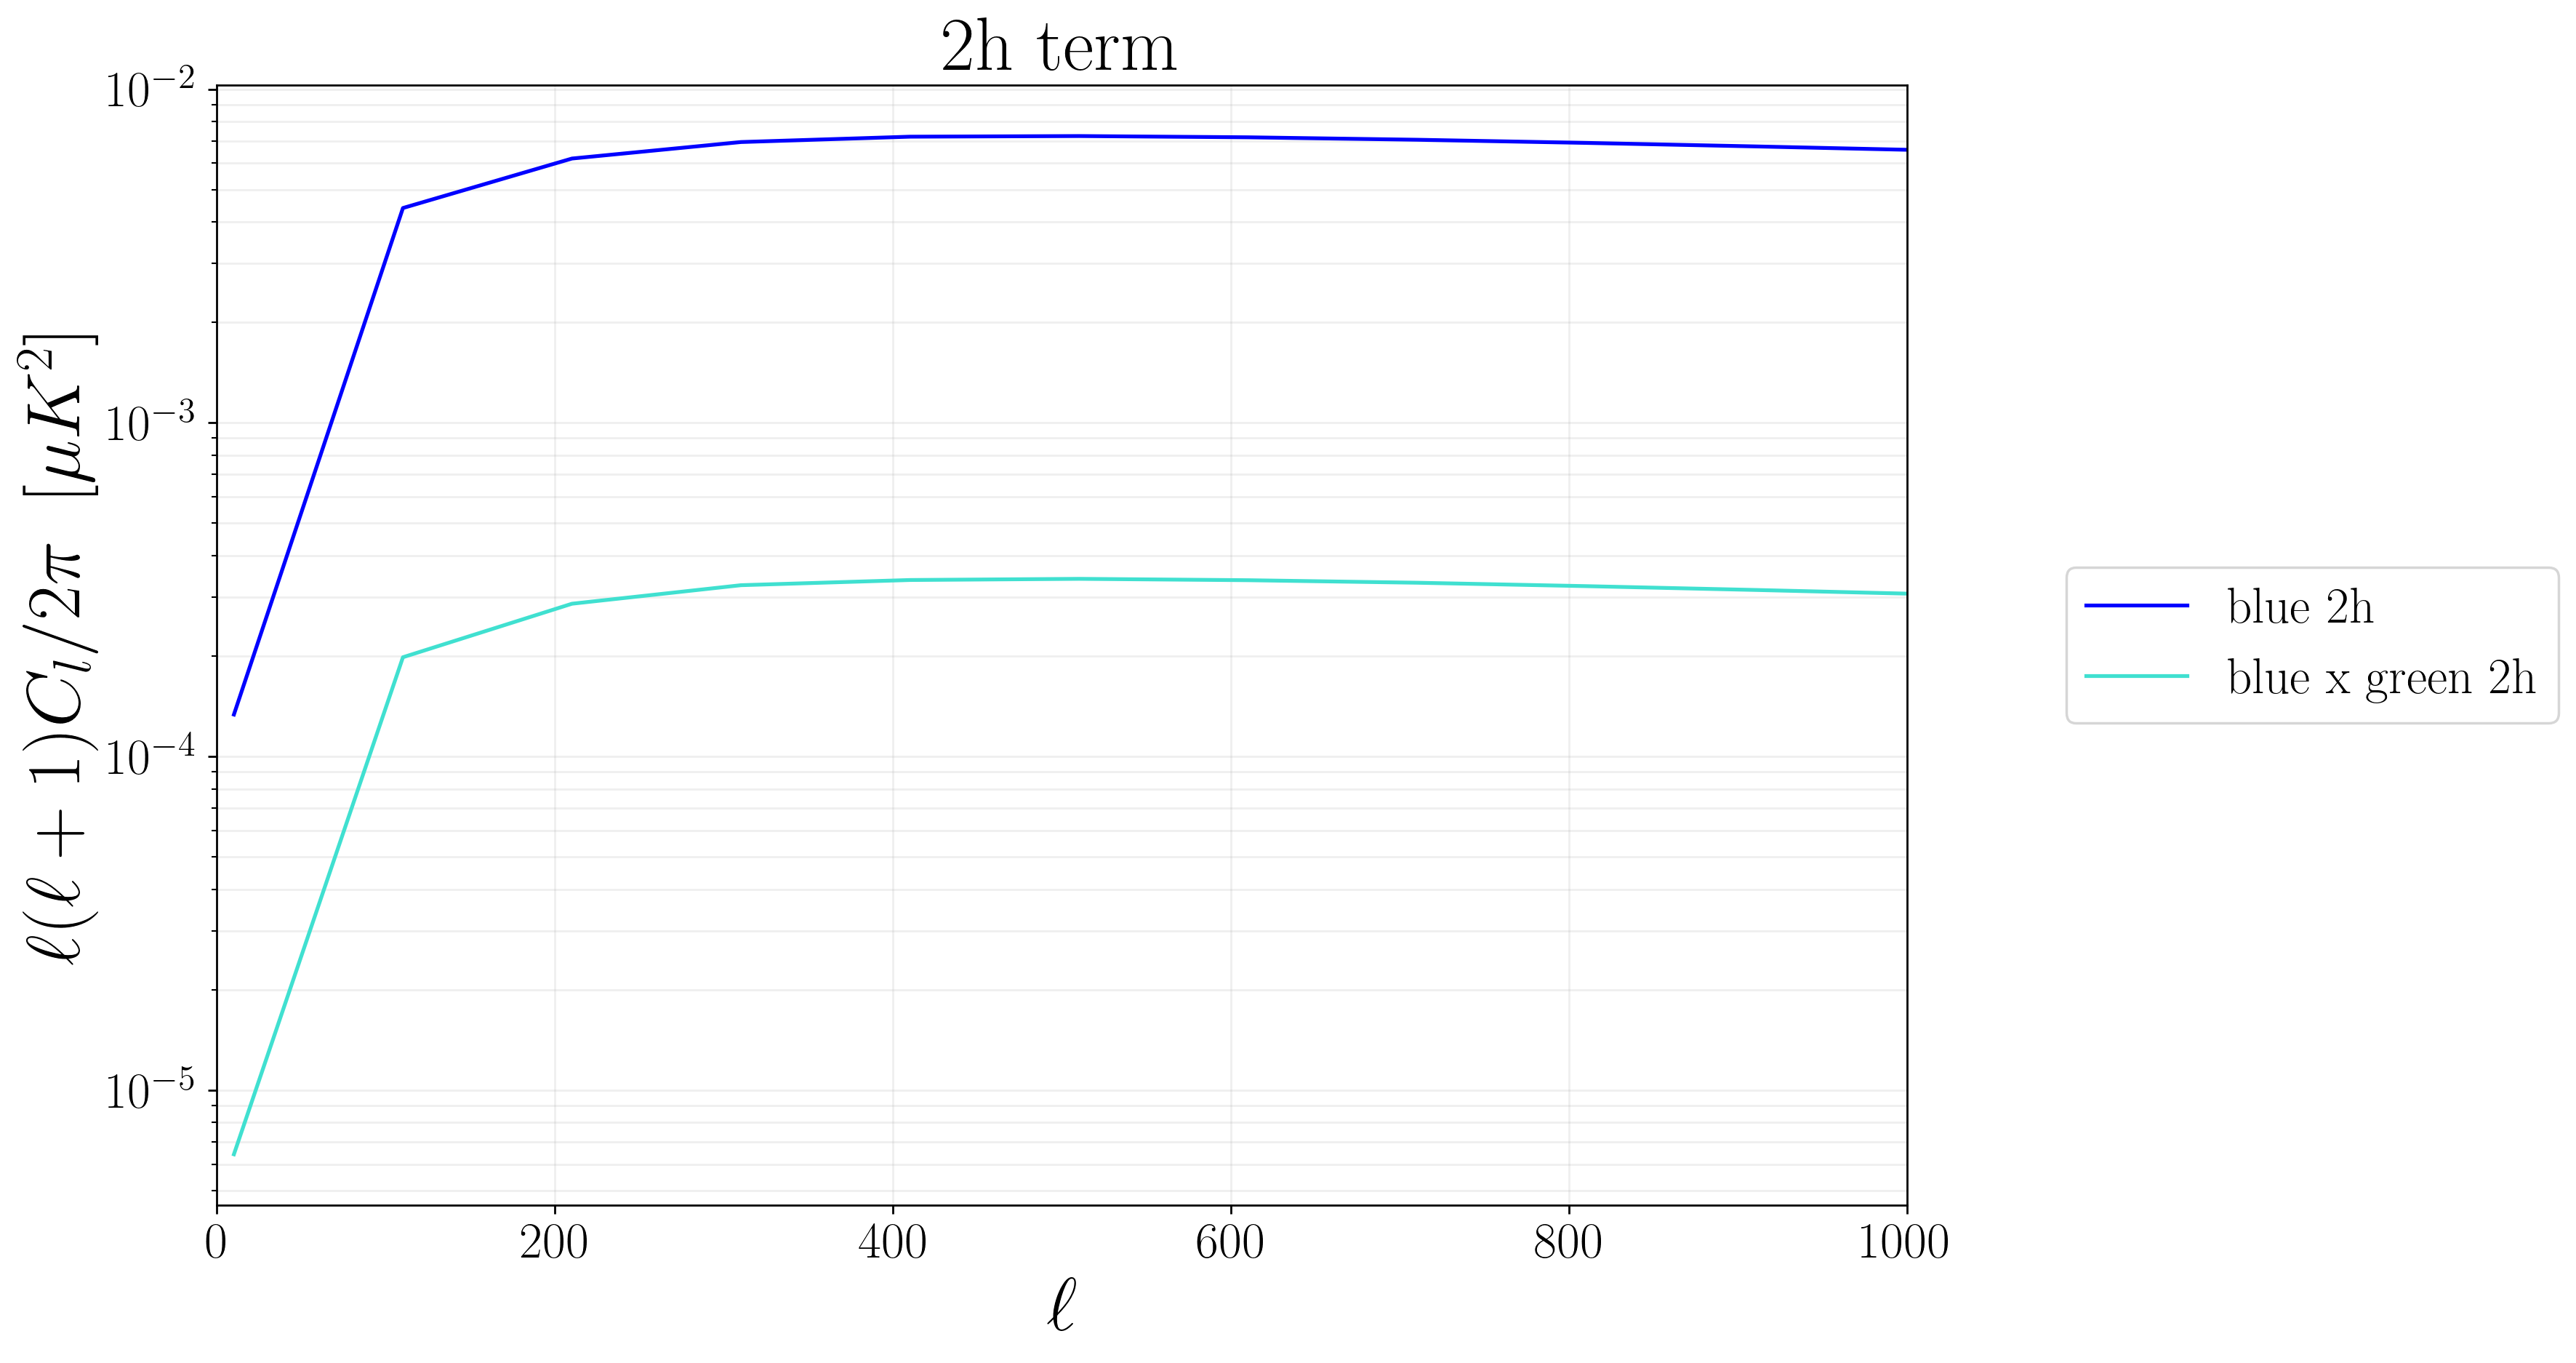

In [24]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title('2h term', fontsize=30)

#noise
plt.plot(cl_gg_blue_ell, cl_gg_blue_2h, "-", color = "blue", label="blue 2h")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green_2h, "-", color = "turquoise", label="blue x green 2h")

plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 1.e3)
#plt.ylim(1e-4,6.e3)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [25]:
galaxy1_HOD = blue_HOD
galaxy2_HOD = red_HOD

In [26]:
galaxy2_HOD['M1_prime_HOD']

33007071959706.23

In [27]:
N = Class()
N.set(pdict)
N.set(common_settings)
#M.set(blue_HOD)

N.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h',
    
        #galaxy 1 
        'galaxy_sample1': galaxy1_HOD['galaxy_sample'],
        'galaxy_sample_id1': galaxy1_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': galaxy1_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': galaxy1_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': galaxy1_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': galaxy1_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': galaxy1_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': galaxy1_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': galaxy2_HOD['galaxy_sample'],
        'galaxy_sample_id2': galaxy2_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': galaxy2_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': galaxy2_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': galaxy2_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': galaxy2_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': galaxy2_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': galaxy2_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
N.compute()

blue_gg = N.cl_gg()
blue_x_red_gg = N.cl_g1g2()



In [28]:
cl_gg_blue_red_ell = np.asarray(blue_x_red_gg ['ell'])
cl_gg_blue_red_1h = np.asarray(blue_x_red_gg ['1h'])
cl_gg_blue_red_2h = np.asarray(blue_x_red_gg ['2h'])

cl_gg_blue_red = cl_gg_blue_red_1h + cl_gg_blue_red_2h

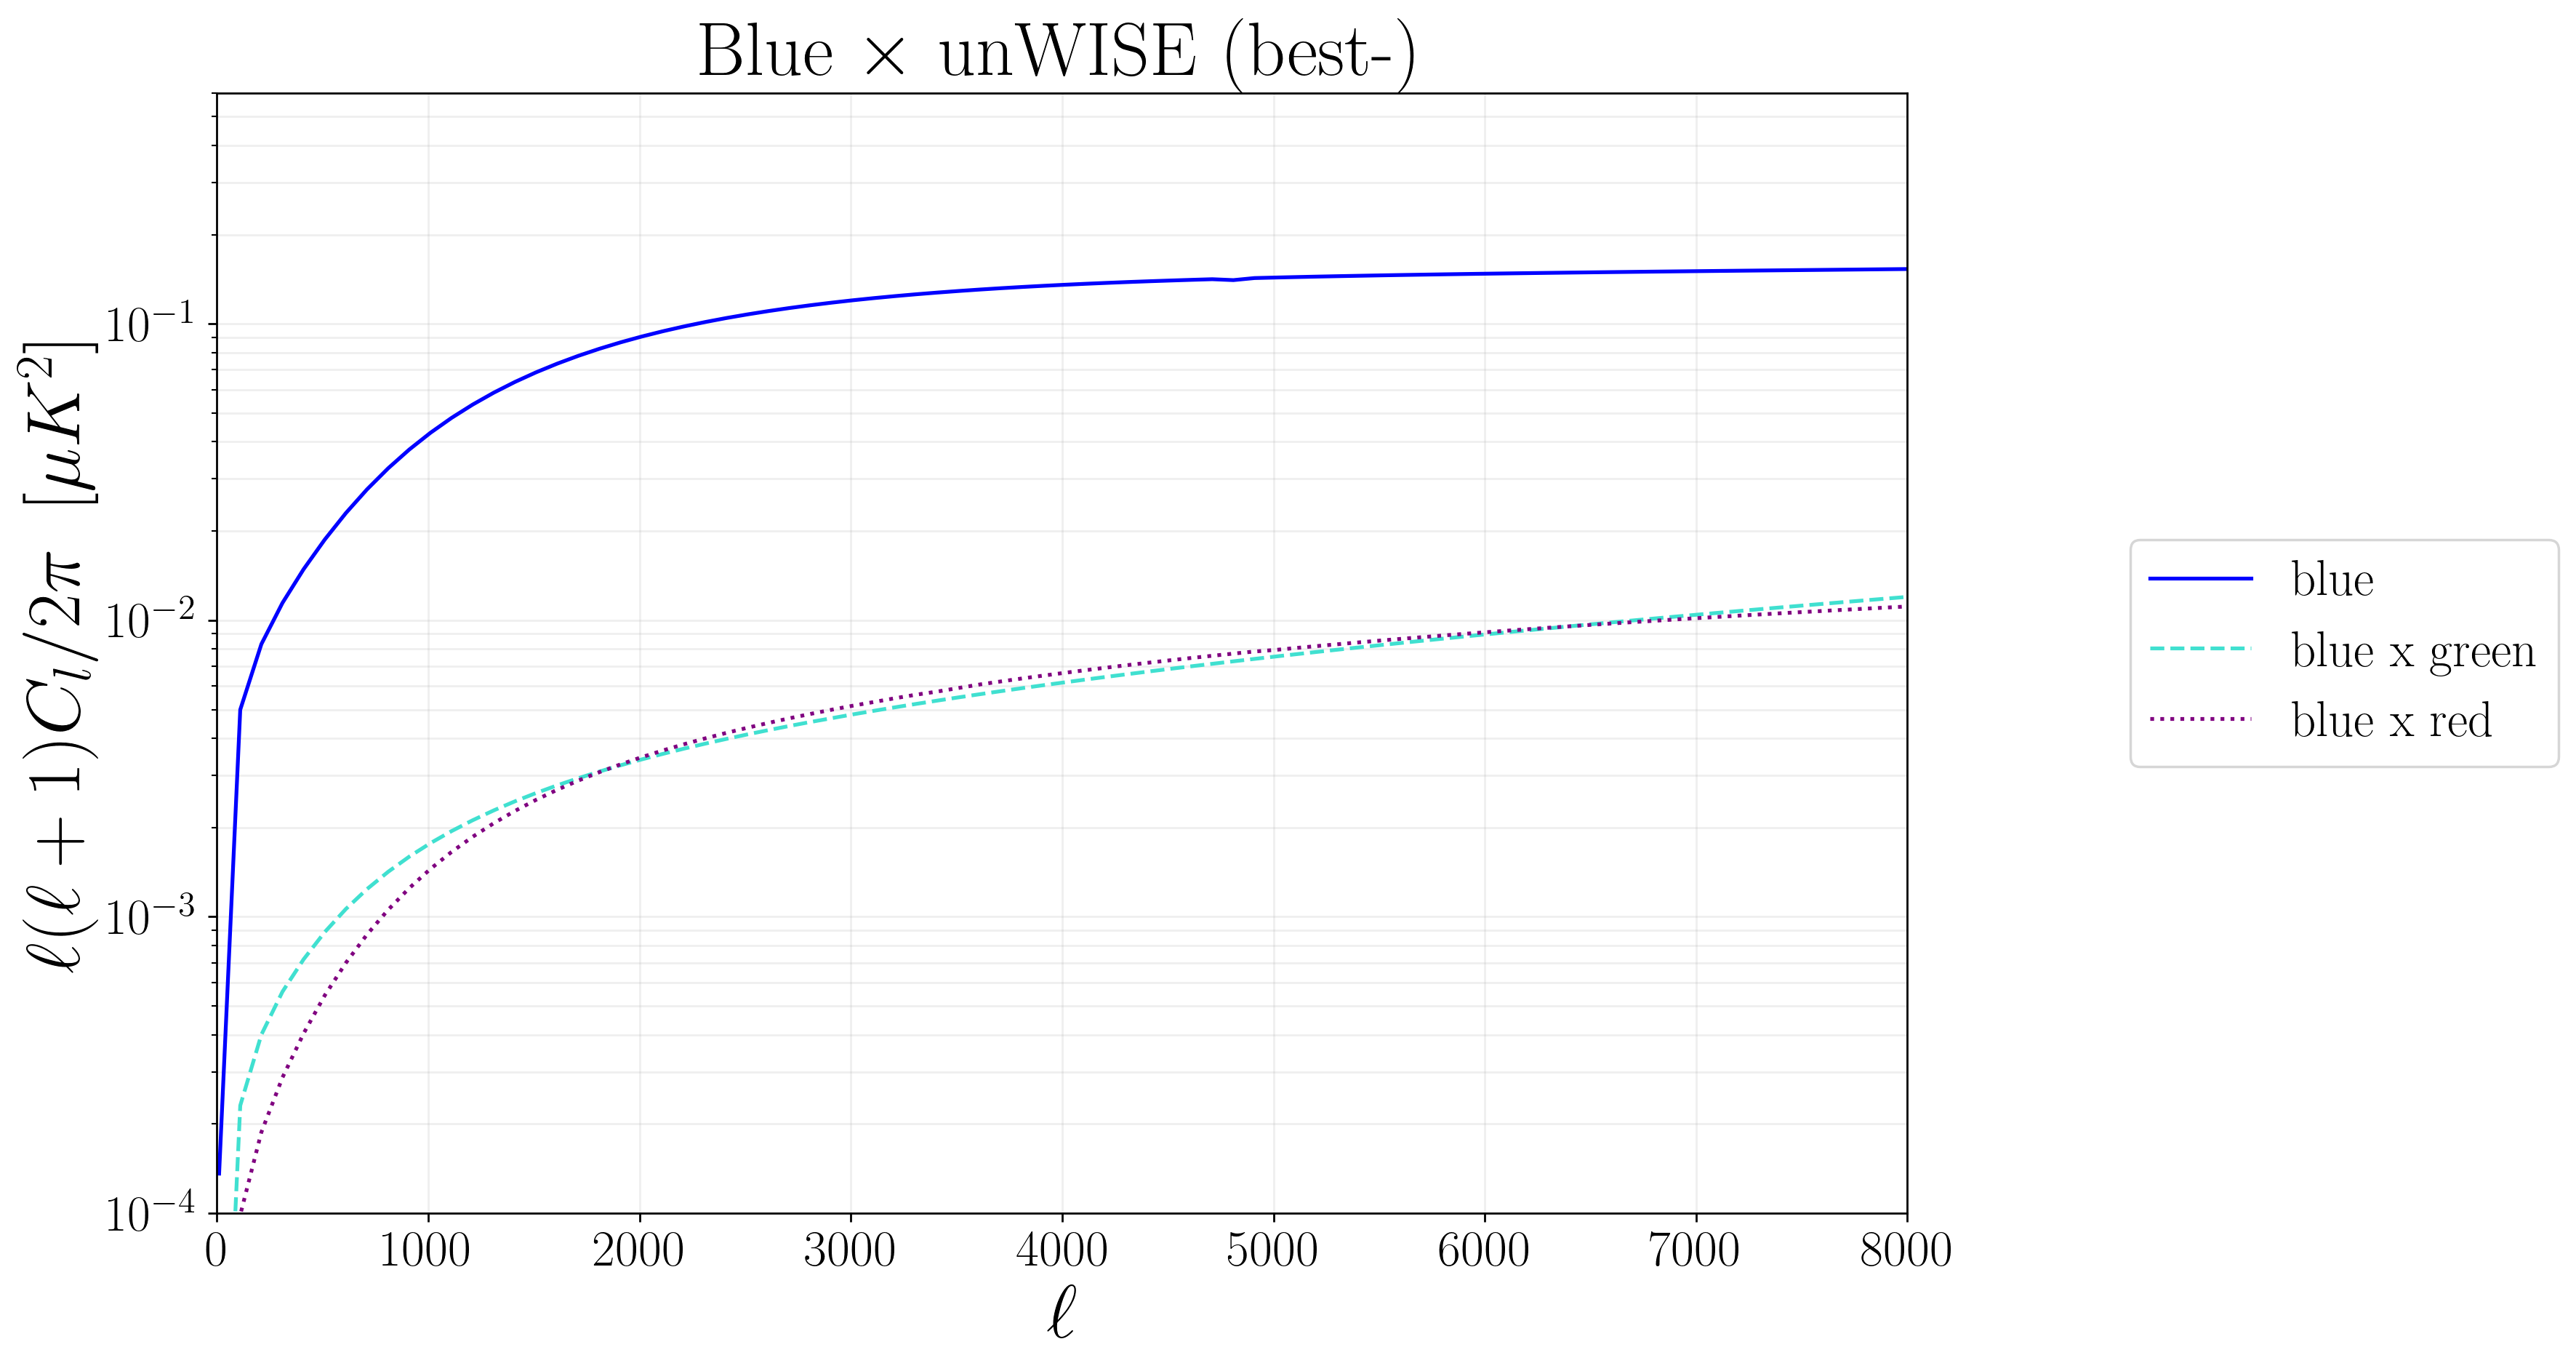

In [29]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.5s)'%params, fontsize=30)


plt.plot(cl_gg_blue_ell, cl_gg_blue, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green, "--", color = "turquoise", label="blue x green")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red, ":", color = "purple", label="blue x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


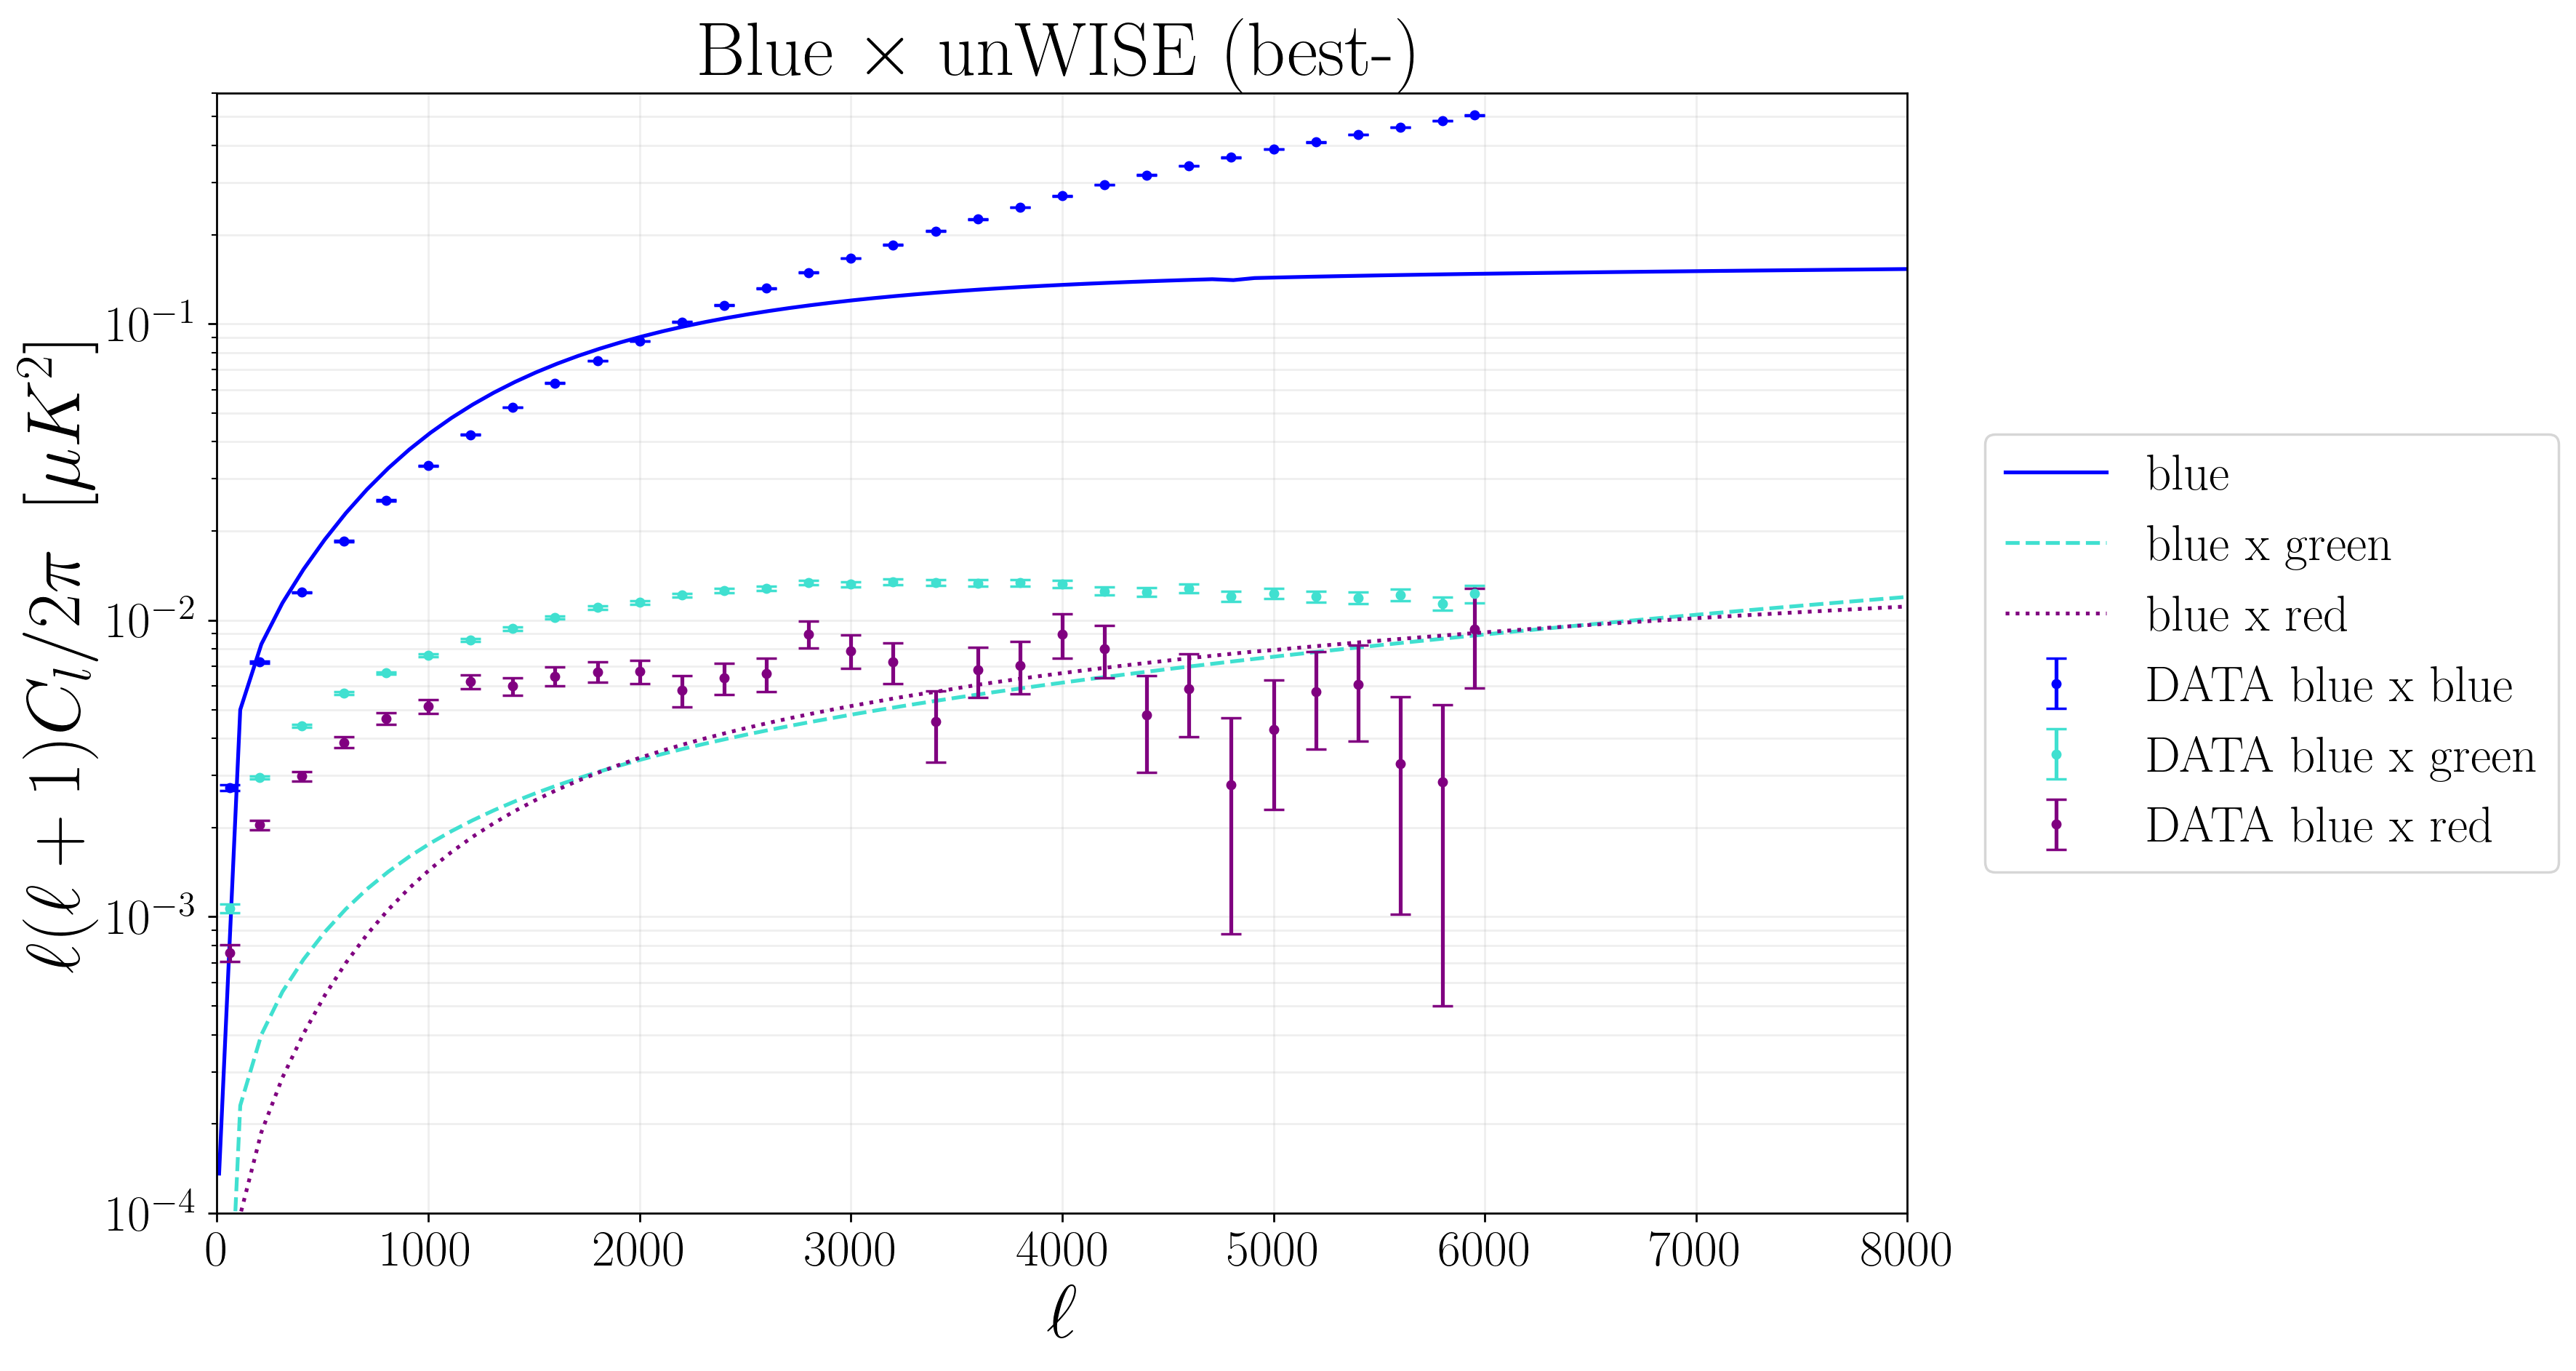

In [30]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.5s)'%params, fontsize=30)

plt.plot(cl_gg_blue_ell, cl_gg_blue, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green, "--", color = "turquoise", label="blue x green")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red, ":", color = "purple", label="blue x red")

plt.errorbar(ell_gg_data_11, cl_gg_data_11, yerr = sigma_gg_data_11,  fmt= ".", color = "blue", capsize=4, label=" DATA blue x blue")
plt.errorbar(ell_gg_data_12, cl_gg_data_12, yerr = sigma_gg_data_12,  fmt= ".", color = "turquoise", capsize=4, label=" DATA blue x green")
plt.errorbar(ell_gg_data_17, cl_gg_data_17, yerr = sigma_gg_data_17,  fmt= ".", color = "purple", capsize=4, label="DATA blue x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## Green x unWISE

In [ ]:
color ="green"
if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']

galaxy1_HOD = green_HOD
galaxy2_HOD = red_HOD

In [ ]:
galaxy1_HOD['galaxy_sample_id']

In [ ]:
galaxy2_HOD['galaxy_sample_id']

In [ ]:
K = Class()
K.set(pdict)
K.set(common_settings)
#M.set(blue_HOD)

K.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h',
    
        #galaxy 1 
        'galaxy_sample1': galaxy1_HOD['galaxy_sample'],
        'galaxy_sample_id1': galaxy1_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': galaxy1_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': galaxy1_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': galaxy1_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': galaxy1_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': galaxy1_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': galaxy1_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': galaxy2_HOD['galaxy_sample'],
        'galaxy_sample_id2': galaxy2_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': galaxy2_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': galaxy2_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': galaxy2_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': galaxy2_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': galaxy2_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': galaxy2_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
K.compute()

green_gg = K.cl_gg()
green_x_red_gg = K.cl_g1g2()



In [ ]:
cl_gg_green_ell = np.asarray(green_gg['ell'])
cl_gg_green_1h = np.asarray(green_gg['1h'])
cl_gg_green_2h = np.asarray(green_gg['2h'])
cl_gg_green = cl_gg_green_1h+cl_gg_green_2h

cl_to_dl_gg = cl_gg_green_ell*(cl_gg_green_ell+1)/2/np.pi

#cl_gg_blue

In [ ]:
cl_gg_green_red_ell = np.asarray(green_x_red_gg ['ell'])
cl_gg_green_red_1h = np.asarray(green_x_red_gg ['1h'])
cl_gg_green_red_2h = np.asarray(green_x_red_gg ['2h'])

cl_gg_green_red = cl_gg_green_red_1h + cl_gg_green_red_2h

In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Green $\\times$ unWISE (%.5s)'%params, fontsize=30)


plt.plot(cl_gg_green_ell, cl_gg_green_2h, "-", color = "green", label="green")
#plt.plot(cl_gg_green_ell, cl_gg_blue_green, "-", color = "turquoise", label="blue x green")
plt.plot(cl_gg_green_ell, cl_gg_green_red_2h, "-", color = "peru", label="green x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Green $\\times$ unWISE (%.5s)'%params, fontsize=30)


plt.plot(cl_gg_green_ell, cl_gg_green, "-", color = "green", label="green")
plt.plot(cl_gg_green_ell, cl_gg_blue_green, "--", color = "turquoise", label="green x blue")
plt.plot(cl_gg_green_ell, cl_gg_green_red, ":", color = "peru", label="green x red")

plt.errorbar(ell_gg_data_22, cl_gg_data_22, yerr = sigma_gg_data_22,  fmt= ".", color = "green", capsize=4, label=" DATA green x green")
plt.errorbar(ell_gg_data_12, cl_gg_data_12, yerr = sigma_gg_data_12,  fmt= ".", color = "turquoise", capsize=4, label=" DATA green x blue ")
plt.errorbar(ell_gg_data_27, cl_gg_data_27, yerr = sigma_gg_data_27,  fmt= ".", color = "peru", capsize=4, label="DATA green x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,0)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## Red x unWISE

In [ ]:
color ="red"
if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']


In [ ]:
L = Class()
L.set(pdict)
L.set(common_settings)
#M.set(blue_HOD)

L.set({
        'output':'gal_gal_1h,gal_gal_2h',
    
       })        
L.compute()

red_gg = L.cl_gg()



In [ ]:
cl_gg_red_ell = np.asarray(red_gg['ell'])
cl_gg_red_1h = np.asarray(red_gg['1h'])
cl_gg_red_2h = np.asarray(red_gg['2h'])
cl_gg_red = cl_gg_red_1h+cl_gg_red_2h

cl_to_dl_gg = cl_gg_red_ell*(cl_gg_red_ell+1)/2/np.pi

#cl_gg_blue

In [ ]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Red $\\times$ unWISE (%.5s)'%params, fontsize=30)

plt.plot(cl_gg_green_ell, cl_gg_red, "-", color = "red", label="red")
plt.plot(cl_gg_green_ell, cl_gg_blue_red, "--", color = "purple", label="red x blue")
plt.plot(cl_gg_green_ell, cl_gg_green_red, ":", color = "peru", label="red x green")

plt.errorbar(ell_gg_data_27, cl_gg_data_27, yerr = sigma_gg_data_27,  fmt= ".", color = "peru", capsize=4, label=" DATA red x green")
plt.errorbar(ell_gg_data_17, cl_gg_data_17, yerr = sigma_gg_data_17,  fmt= ".", color = "purple", capsize=4, label="DATA red x blue")
plt.errorbar(ell_gg_data_77, cl_gg_data_77, yerr = sigma_gg_data_77,  fmt= ".", color = "red", capsize=4, label="DATA red x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,0)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [ ]:
# path_save = "/Users/aleksandra/software/ILC/ILC_class-sz_curves/websky_best-fit_HOD_11-23/"

# np.savetxt(path_save+"ell_dl_gg_blue_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue))
# np.savetxt(path_save+"ell_dl_gg_green_x_green.txt", (cl_gg_green_ell, cl_gg_green))
# np.savetxt(path_save+"ell_dl_gg_red_x_red.txt", (cl_gg_red_ell, cl_gg_red))

# np.savetxt(path_save+"ell_dl_gg_blue_x_red.txt", (cl_gg_blue_ell, cl_gg_blue_red))
# np.savetxt(path_save+"ell_dl_gg_red_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_red))

# np.savetxt(path_save+"ell_dl_gg_green_x_red.txt", (cl_gg_blue_ell, cl_gg_green_red))
# np.savetxt(path_save+"ell_dl_gg_red_x_green.txt", (cl_gg_blue_ell, cl_gg_green_red))

# np.savetxt(path_save+"ell_dl_gg_blue_x_green.txt", (cl_gg_blue_ell, cl_gg_blue_green))
# np.savetxt(path_save+"ell_dl_gg_green_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_green))